# Turning Points and Inflection Points

This example will walk the user through implementing DCF fits to data sets with turning points and inflection points. It builds on the details in the 'Simple Example Code' and uses the 'constraints' keyword argument introduced there. The 'constraints' keyword argument is used to adjust the type of DCF that is being fitted. Recall that by default ``maxsmooth`` implements a Maximally Smooth Function or MSF with constraints=2 i.e. derivatives of order $m \geq 2$ constrained so that they do not cross zero. This allows for turning points in the
DCF as illustrated below.

We start by generating some noisy data that we know will include a turning point and defining the order of the DCF we would like to fit.

In [1]:
import numpy as np

x = np.linspace(-10, 10, 100)
noise = np.random.normal(0, 0.02, 100)
y = x**(2) + noise

N = 10

We can go ahead and plot this data just to double check it features a turning point.

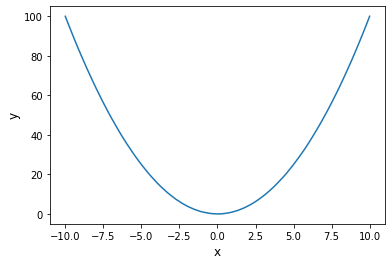

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

As already stated ``maxsmooth`` does not constrain the first derivative of the DCF by deafult so we can go ahead and fit the data.

In [3]:
from maxsmooth.DCF import smooth

res = smooth(x, y, N)

#############################################################
#############################################################
----------------------OPTIMUM RESULT-------------------------
Time: 2.1448731422424316
Polynomial Order: 10
Number of Constrained Derivatives: 8
Signs : [-1 -1  1 -1  1 -1  1 -1]
Objective Function Value: 0.04927823450747571
Parameters: [[ 1.17731858e-02  2.02215641e-01  1.00004968e+00  3.64579570e-06
  -4.01724980e-07  3.79943911e-08 -2.52386154e-09  1.08957701e-10
  -2.74734089e-12  3.07852441e-14]]
Method: qp-sign_flipping
Model: difference_polynomial
Constraints: m >= 2
Zero Crossings Used? (0 signifies Yes
 in derivative order "i"): {'0': 1, '1': 0}
-------------------------------------------------------------
#############################################################


If we than plot the resultant residuals we will see that despite the data having a turning point present we have recovered the Gaussian noise.

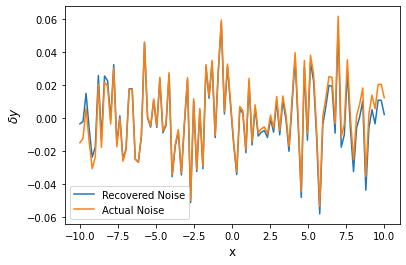

In [4]:
plt.plot(x, y- res.y_fit, label='Recovered Noise')
plt.plot(x, noise, label='Actual Noise')
plt.ylabel(r'$\delta y$', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()
plt.show()

To illustrate what happens when there is an inflection point in the data we can define some sinusoidal data as so.

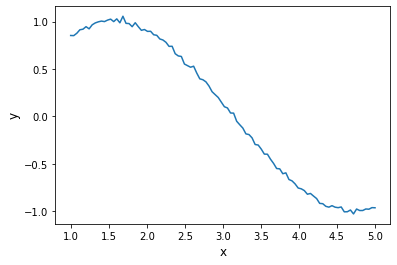

In [5]:
x = np.linspace(1, 5, 100)
noise = np.random.normal(0, 0.02, 100)
y = np.sin(x) + noise

N = 10

plt.plot(x, y)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

If we proceed to fit this with smooth() in its default settings we will get a poor fit as by default the second derivative is constrained. We need to lift this constraint to allow for the prominant inflection point to be modelled. We do this by setting the keyword argument constraints=3 creating a Partially Smooth Function
or PSF.


#############################################################
#############################################################
----------------------OPTIMUM RESULT-------------------------
Time: 1.616485357284546
Polynomial Order: 10
Number of Constrained Derivatives: 8
Signs : [ 1 -1  1 -1  1 -1  1 -1]
Objective Function Value: 1.2278492797034808
Parameters: [[ 1.34984313e-01 -7.37897372e-01 -1.35984051e-02  1.60265401e-02
  -1.21425226e-02  6.13320573e-03 -2.06526186e-03  4.47071803e-04
  -5.64542010e-05  3.16834713e-06]]
Method: qp-sign_flipping
Model: difference_polynomial
Constraints: m >= 2
Zero Crossings Used? (0 signifies Yes
 in derivative order "i"): {'0': 0, '1': 0}
-------------------------------------------------------------
#############################################################
#############################################################
#############################################################
----------------------OPTIMUM RESULT-------------------------
Time: 1

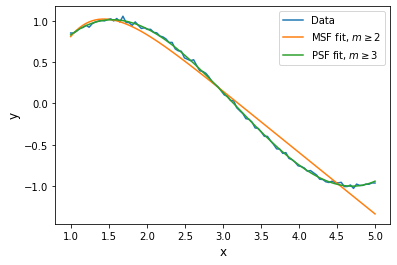

In [6]:
res_msf = smooth(x, y, N)
res_psf = smooth(x, y, N, constraints=3)

plt.plot(x, y, label='Data')
plt.plot(x, res_msf.y_fit, label=r'MSF fit, $m \geq 2$')
plt.plot(x, res_psf.y_fit, label=r'PSF fit, $m \geq 3$')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.show()

Finally, we can plot the residuals to further see that by lifting the constraint on the second derivative we have allowed an inflection point in the data.

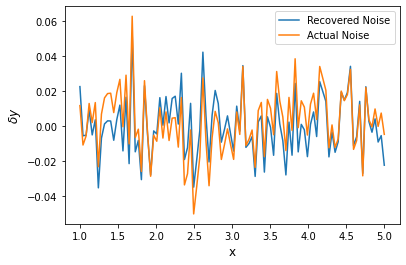

In [7]:
plt.plot(x, y - res_psf.y_fit, label='Recovered Noise')
plt.plot(x, noise, label='Actual Noise')
plt.ylabel(r'$\delta y$', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()
plt.show()